# **Data Extraction :**

In [4]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"ashispalai","key":"9e67fb2b26252b49b11915240b00c1f2"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle competitions download -c birdsong-recognition

100% 22.1G/22.1G [02:03<00:00, 265MB/s]
100% 22.1G/22.1G [02:03<00:00, 192MB/s]


In [ ]:
!unzip '/content/birdsong-recognition.zip'

# **Types of Feature Extraction from Audio Clips :**




*   **Zero Crossing Rate**
*   **Spectral Centroid**
*   **Spectral Rolloff**


*   **Spectral Bandwidth**


*   **MFCC — Mel-Frequency Cepstral Coefficients**
*   **Spectrogram**
*   **Tempogram**
*   **Chroma frequency**














In [ ]:
!pip install torchmetrics

In [2]:
import librosa
import torchaudio.transforms as T
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import librosa.display
import  torch
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from torchmetrics.functional import f1_score
import time
import warnings 
import os
import sklearn
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from torch import nn
from torch import optim
from tqdm import tqdm
import random
warnings.filterwarnings('ignore')

## **Zero Crossing Rate :**

The oscillation rate between **postive-->zero --> negative** and **negative --> zero --> positive** for a time vs amplitude distribution of an audio signal.

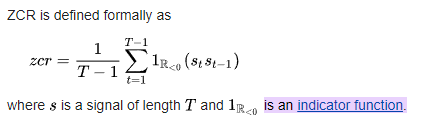

In [ ]:
sample_rate = 48000
n_fft = 400
hop_length = 512
n_mels = 20
duration = 20

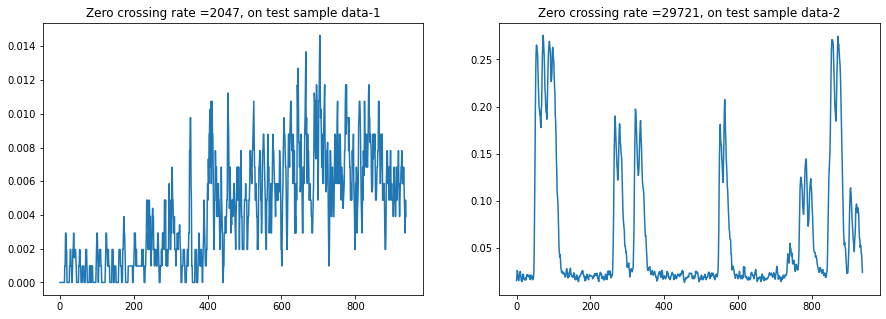

In [ ]:
k =1
fig, ax = plt.subplots(1,2,figsize = (15,5))
for i in os.listdir('/content/example_test_audio'):
  y, sr = librosa.load('/content/example_test_audio/'+i,sr = sample_rate,duration=10)
  zcrs = librosa.feature.zero_crossing_rate(y)
  plt.subplot(1,2,k)
  plt.plot(zcrs[0])
  plt.title('Zero crossing rate ={}, on test sample data-{}'.format(sum(librosa.zero_crossings(y)),k))
  k+=1

## **Spectral Centroid**

Defines the center of mass of a spectrum where the most of the energy is concentrated.

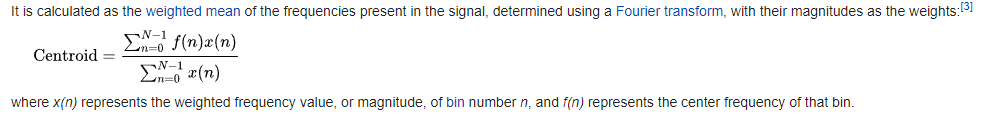

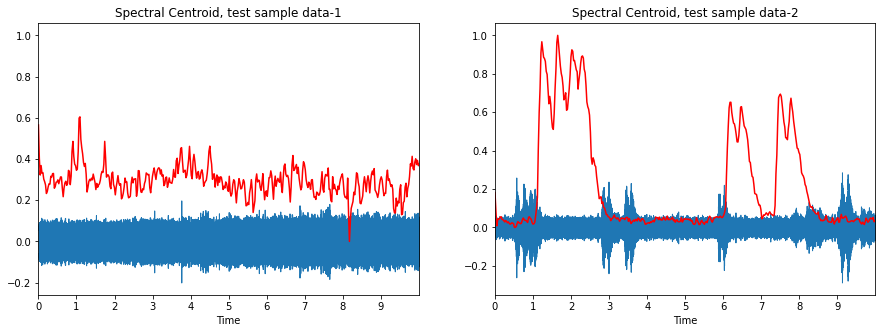

In [ ]:
k =1
fig, ax = plt.subplots(1,2,figsize = (15,5))
for i in os.listdir('/content/example_test_audio'):
  y, sr = librosa.load('/content/example_test_audio/'+i,sr = sample_rate,duration=10)
  
  spectral_centroids = librosa.feature.spectral_centroid(y, sr=sample_rate)[0]

  # Computing the time variable for visualization
  frames = range(len(spectral_centroids))
  t = librosa.frames_to_time(frames)

  # Normalising the spectral centroid for visualisation
  def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

  plt.subplot(1,2,k)
  librosa.display.waveplot(y, sr=sample_rate,)
  plt.plot(t, normalize(spectral_centroids), color='r')
  plt.title('Spectral Centroid, test sample data-{}'.format(k))
  k+=1

**Observation :**
Theres is a rise in spectral centroid at time after 1 sec for both sample test data

## **Spectral Rolloff :**
The roll-off frequency is defined for each frame as the center frequency for a spectrogram bin such that at least roll_percent (0.85 by default) of the energy of the spectrum in this frame is contained in this bin and the bins below.


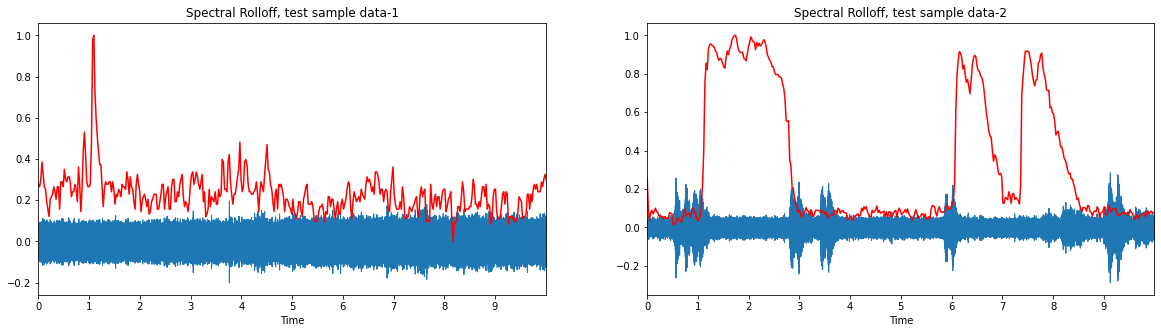

In [ ]:
k =1
fig, ax = plt.subplots(1,2,figsize = (20,5))
for i in os.listdir('/content/example_test_audio'):
  y, sr = librosa.load('/content/example_test_audio/'+i,sr = sample_rate,duration=10)

  rolloff = librosa.feature.spectral_rolloff(y, sr=sample_rate)[0]
  
  # Computing the time variable for visualization
  frames = range(len(rolloff))
  t = librosa.frames_to_time(frames)

  # Normalising the spectral centroid for visualisation
  def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

  plt.subplot(1,2,k)
  librosa.display.waveplot(y, sr=sample_rate,)
  plt.plot(t, normalize(rolloff), color='r')
  plt.title('Spectral Rolloff, test sample data-{}'.format(k))
  k+=1

## **Spectral Bandwidth :**
The spectral bandwidth is defined as the width of the band of light at one-half the peak maximum (or full width at half maximum [FWHM]) and is represented by the two vertical red lines and λSB on the wavelength axis.

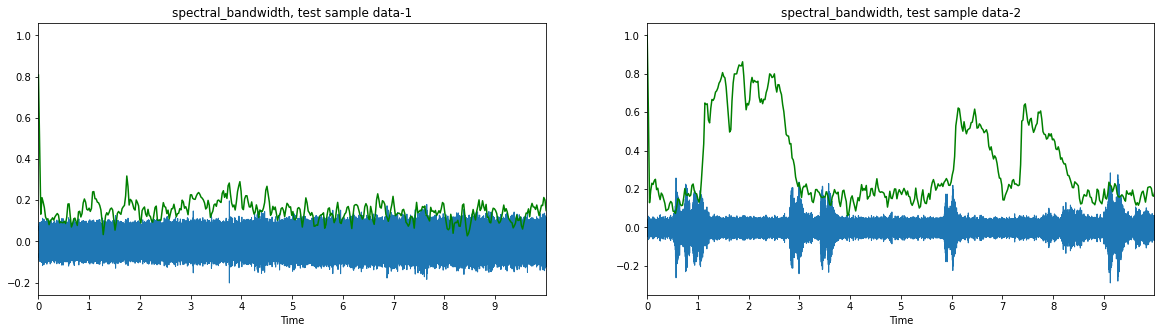

In [ ]:
k =1
fig, ax = plt.subplots(1,2,figsize = (20,5))
for i in os.listdir('/content/example_test_audio'):
  y, sr = librosa.load('/content/example_test_audio/'+i,sr = sample_rate,duration =10)

  spectral_bandwidth = librosa.feature.spectral_bandwidth(y, sr=sample_rate)[0]
  
  # Computing the time variable for visualization
  frames = range(len(spectral_bandwidth))
  t = librosa.frames_to_time(frames)

  # Normalising the spectral centroid for visualisation
  def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

  plt.subplot(1,2,k)
  librosa.display.waveplot(y, sr=sample_rate,)
  plt.plot(t, normalize(spectral_bandwidth), color='g')
  plt.title('spectral_bandwidth, test sample data-{}'.format(k))
  k+=1

## **MFCC — Mel-Frequency Cepstral Coefficients :**
is a representation of the short-term power spectrum of a sound, based on some transformation in a Mel-scale

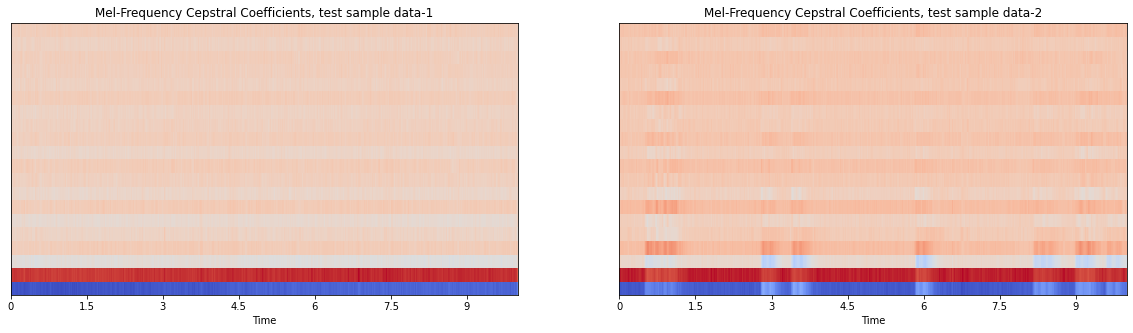

In [ ]:
k =1
fig, ax = plt.subplots(1,2,figsize = (20,5))
for i in os.listdir('/content/example_test_audio'):
  y, sr = librosa.load('/content/example_test_audio/'+i,sr = sample_rate,duration =10)

  mfccs  = librosa.feature.mfcc(y, sr=sample_rate)

  plt.subplot(1,2,k)
  librosa.display.specshow(mfccs, sr=sr, x_axis='time')
  plt.title('Mel-Frequency Cepstral Coefficients, test sample data-{}'.format(k))
  k+=1

## **Spectrogram :**

A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time.

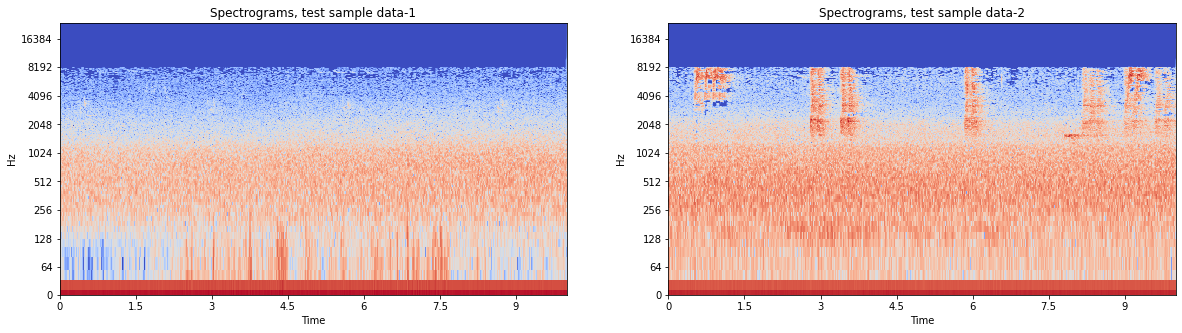

In [ ]:
k =1
fig, ax = plt.subplots(1,2,figsize = (20,5))
for i in os.listdir('/content/example_test_audio'):
  y, sr = librosa.load('/content/example_test_audio/'+i,sr = sample_rate,duration =10)

  spectrogram  = librosa.stft(y)
  spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))
  

  plt.subplot(1,2,k)
  librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time',y_axis='log')
  plt.title('Spectrograms, test sample data-{}'.format(k))
  k+=1

## **Tempogram :**
Tempo refers to the speed of an audio piece, which is usually measured in beats per minute (bpm) units. 

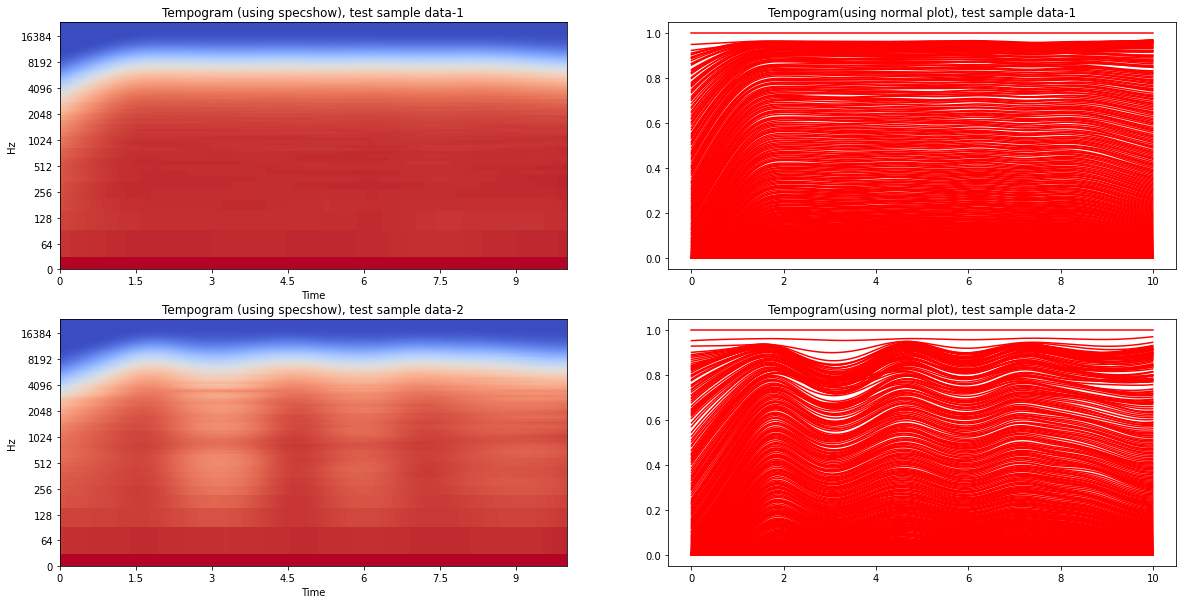

In [ ]:
k =1
n =1 
fig, ax = plt.subplots(2,2,figsize = (20,10))
for i in os.listdir('/content/example_test_audio'):
  y, sr = librosa.load('/content/example_test_audio/'+i,sr = sample_rate,duration =10)

  # Compute local onset autocorrelation
  oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
  times = librosa.times_like(oenv, sr=sr, hop_length=hop_length)
  tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
                                      hop_length=hop_length)
  

  plt.subplot(2,2,k)
  librosa.display.specshow(tempogram, sr=sr,x_axis='time',y_axis='log')
  plt.title('Tempogram (using specshow), test sample data-{}'.format(n))
  k+=1
  plt.subplot(2,2,k)
  plt.plot(times,tempogram.transpose(),color='r')
  plt.title('Tempogram(using normal plot), test sample data-{}'.format(n))
  k+=1
  n+=1

## **Chroma freature :**


 

*   Capture harmonic and melodic characteristics of music, while being robust to changes in timbre and instrumentation.
*   We can Chroma feature visualization to know how dominant the characteristics of a certain pitch {C, C♯, D, D♯, E, F, F♯, G, G♯, A, A♯, B} is present in the sampled frame.



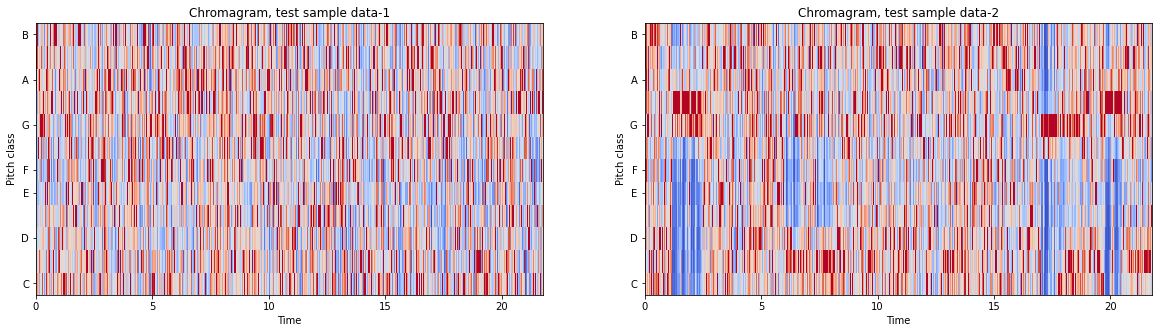

In [ ]:
k =1
fig, ax = plt.subplots(1,2,figsize = (20,5))
for i in os.listdir('/content/example_test_audio'):
  y, sr = librosa.load('/content/example_test_audio/'+i,sr = sample_rate,duration =10)

  chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=hop_length)


  plt.subplot(1,2,k)
  librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
  plt.title('Chromagram, test sample data-{}'.format(k))
  k+=1

# **Feature Extraction :**

In [ ]:
os.remove('/content/train_audio/lotduc/XC195038.mp3')

In [ ]:
header = 'filename,zero_crossing_rate,Spectral_Centroid,Spectral_Rolloff,Spectral_Bandwidth,Spectrogram,Tempogram,Chroma_freature,'
for i in range(1, 21):
    header += f'mfcc_{i},'
header += ' label'
header = header.split(',')

In [ ]:
blank_df = pd.DataFrame(columns=header)
blank_df.to_csv('dataset_audio_features.csv',index=False)

In [ ]:
for bird_foldername in os.listdir('/content/train_audio/'):
  for song_name in os.listdir('/content/train_audio/'+bird_foldername):
    y, sr = librosa.load('/content/train_audio/'+bird_foldername+'/'+song_name,duration=duration,sr=sample_rate)
    zcr = librosa.feature.zero_crossing_rate(y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectrogram  = librosa.stft(y)
    spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))
    oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
    tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,hop_length=hop_length)
    chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=hop_length)
    row = [(bird_foldername+'/'+song_name),np.mean(zcr),np.mean(spec_cent),np.mean(rolloff),np.mean(spec_bw),np.mean(spectrogram_db),np.mean(tempogram),np.mean(chromagram)]

    mfcc = librosa.feature.mfcc(y=y, sr=sr)   
    for i in mfcc:
      row.append(np.mean(i))
    row.append(bird_foldername)
    with open(r'dataset_audio_features.csv', 'a') as f:
      writer = csv.writer(f)
      writer.writerow(row)


# **Data Preparation for Base Model :**

In [ ]:
data = pd.read_csv('final_data_.csv')
data.head()# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)#Encoding the Labels
birds_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(birds_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

print('Train data shape',X_train.shape)
print('Train output length',len(y_train))
print('Test data shape',X_test.shape)
print('Test output length',len(y_test))

Train data shape (17099, 27)
Train output length 17099
Test data shape (4275, 27)
Test output length 4275


In [ ]:
# Convert data to torch tensors
class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X).type(torch.FloatTensor)
        self.y = torch.from_numpy(y).type(torch.LongTensor)
        self.len = self.X.shape[0]
       
    def __getitem__(self, index):
        return self.X[index], self.y[index]
   
    def __len__(self):
        return self.len
   
batch_size = 32

# Instantiate training and test data
train_data = Data(X_train, y_train)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(X_test, y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

# Check it's working
for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch+1}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break

for batch, (X, y) in enumerate(test_dataloader):
    print(f"Batch: {batch+1}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break

Batch: 1
X shape: torch.Size([32, 27])
y shape: torch.Size([32])
Batch: 1
X shape: torch.Size([32, 27])
y shape: torch.Size([32])






# **Base Model-1 :**

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
input_dim = 27
hidden_dim1 = 1024
hidden_dim2 = 512
output_dim = 264

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()
        
        self.linear1 = torch.nn.Linear(27, hidden_dim1)
        self.activation1 = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(hidden_dim1, hidden_dim2)
        self.activation2 = torch.nn.ReLU()
        self.linear3 = torch.nn.Linear(hidden_dim2, output_dim)
        self.dropout = torch.nn.Dropout(p=0.2, inplace=False)
        

    def forward(self, x):
        x = self.linear1(x)
        x = self.dropout(x)
        x = self.activation1(x)
        x = self.linear2(x)
        x = self.dropout(x)
        x = self.activation2(x)
        x = self.linear3(x)
    
        return x

tinymodel = TinyModel()
       

print(tinymodel)

TinyModel(
  (linear1): Linear(in_features=27, out_features=1024, bias=True)
  (activation1): ReLU()
  (linear2): Linear(in_features=1024, out_features=512, bias=True)
  (activation2): ReLU()
  (linear3): Linear(in_features=512, out_features=264, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [ ]:
from torchsummary import summary
summary(tinymodel,(27,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1024]          28,672
           Dropout-2                 [-1, 1024]               0
              ReLU-3                 [-1, 1024]               0
            Linear-4                  [-1, 512]         524,800
           Dropout-5                  [-1, 512]               0
              ReLU-6                  [-1, 512]               0
            Linear-7                  [-1, 264]         135,432
Total params: 688,904
Trainable params: 688,904
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 2.63
Estimated Total Size (MB): 2.67
----------------------------------------------------------------


# **Base Model Training :**

In [ ]:
learning_rate = 0.01

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(tinymodel.parameters(), lr=learning_rate )

f1_score_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}
EPOCHS = 50

In [ ]:
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_f1_score = 0

    tinymodel.train()
    for X, y in train_dataloader:
      optimizer.zero_grad()

      y_train_pred = tinymodel(X)

      train_loss = loss_fn(y_train_pred, y)
      train_f1_score = f1_score(y_train_pred,y, num_classes=output_dim)

      train_loss.backward()
      optimizer.step()

      train_epoch_loss += train_loss.item()
      train_epoch_f1_score += train_f1_score.item()

    
    # VALIDATION    
    torch.no_grad()
    val_epoch_loss = 0
    val_epoch_acc_f1_score = 0

    tinymodel.eval()
    for X, y in test_dataloader:
      y_val_pred = tinymodel(X)
      val_loss = loss_fn(y_val_pred, y)
      val_f1_score= f1_score(y_val_pred,y, num_classes=output_dim)

      val_epoch_loss += val_loss.item()
      val_epoch_acc_f1_score += val_f1_score.item()



    loss_stats['train'].append(train_epoch_loss/len(train_dataloader))
    loss_stats['val'].append(val_epoch_loss/len(test_dataloader))
    f1_score_stats['train'].append(train_epoch_f1_score /len(train_dataloader))
    f1_score_stats['val'].append(val_epoch_acc_f1_score/len(test_dataloader))

    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_dataloader):.5f} | Val Loss: {val_epoch_loss/len(test_dataloader):.5f} | Train_f1_score: {train_epoch_f1_score/len(train_dataloader):.3f}| Val_f1_score: {val_epoch_acc_f1_score/len(test_dataloader):.3f}')

    



Begin training.


  2%|▏         | 1/50 [00:04<03:48,  4.66s/it]

Epoch 001: | Train Loss: 5.56111 | Val Loss: 5.53181 | Train_f1_score: 0.007| Val_f1_score: 0.011


  4%|▍         | 2/50 [00:12<05:24,  6.75s/it]

Epoch 002: | Train Loss: 5.50335 | Val Loss: 5.47859 | Train_f1_score: 0.012| Val_f1_score: 0.020


  6%|▌         | 3/50 [00:21<06:04,  7.75s/it]

Epoch 003: | Train Loss: 5.44464 | Val Loss: 5.42451 | Train_f1_score: 0.020| Val_f1_score: 0.030


  8%|▊         | 4/50 [00:29<06:02,  7.88s/it]

Epoch 004: | Train Loss: 5.37669 | Val Loss: 5.36756 | Train_f1_score: 0.029| Val_f1_score: 0.035


 10%|█         | 5/50 [00:34<05:01,  6.71s/it]

Epoch 005: | Train Loss: 5.30907 | Val Loss: 5.30771 | Train_f1_score: 0.034| Val_f1_score: 0.041


 12%|█▏        | 6/50 [00:39<04:24,  6.00s/it]

Epoch 006: | Train Loss: 5.23775 | Val Loss: 5.24518 | Train_f1_score: 0.043| Val_f1_score: 0.046


 14%|█▍        | 7/50 [00:43<04:00,  5.59s/it]

Epoch 007: | Train Loss: 5.16422 | Val Loss: 5.18041 | Train_f1_score: 0.050| Val_f1_score: 0.050


 16%|█▌        | 8/50 [00:48<03:42,  5.29s/it]

Epoch 008: | Train Loss: 5.08888 | Val Loss: 5.11351 | Train_f1_score: 0.056| Val_f1_score: 0.060


 18%|█▊        | 9/50 [00:53<03:29,  5.11s/it]

Epoch 009: | Train Loss: 5.01134 | Val Loss: 5.05242 | Train_f1_score: 0.061| Val_f1_score: 0.061


 20%|██        | 10/50 [00:57<03:19,  4.99s/it]

Epoch 010: | Train Loss: 4.93996 | Val Loss: 4.99458 | Train_f1_score: 0.069| Val_f1_score: 0.068


 22%|██▏       | 11/50 [01:02<03:11,  4.91s/it]

Epoch 011: | Train Loss: 4.87242 | Val Loss: 4.94171 | Train_f1_score: 0.074| Val_f1_score: 0.075


 24%|██▍       | 12/50 [01:07<03:04,  4.84s/it]

Epoch 012: | Train Loss: 4.81253 | Val Loss: 4.89396 | Train_f1_score: 0.081| Val_f1_score: 0.078


 26%|██▌       | 13/50 [01:12<02:57,  4.80s/it]

Epoch 013: | Train Loss: 4.75809 | Val Loss: 4.85678 | Train_f1_score: 0.085| Val_f1_score: 0.083


 28%|██▊       | 14/50 [01:16<02:51,  4.77s/it]

Epoch 014: | Train Loss: 4.70997 | Val Loss: 4.81564 | Train_f1_score: 0.091| Val_f1_score: 0.087


 30%|███       | 15/50 [01:21<02:44,  4.71s/it]

Epoch 015: | Train Loss: 4.66071 | Val Loss: 4.78366 | Train_f1_score: 0.097| Val_f1_score: 0.087


 32%|███▏      | 16/50 [01:26<02:44,  4.84s/it]

Epoch 016: | Train Loss: 4.61276 | Val Loss: 4.75140 | Train_f1_score: 0.099| Val_f1_score: 0.095


 34%|███▍      | 17/50 [01:31<02:41,  4.90s/it]

Epoch 017: | Train Loss: 4.57783 | Val Loss: 4.72762 | Train_f1_score: 0.104| Val_f1_score: 0.099


 36%|███▌      | 18/50 [01:36<02:33,  4.81s/it]

Epoch 018: | Train Loss: 4.54255 | Val Loss: 4.70377 | Train_f1_score: 0.111| Val_f1_score: 0.102


 38%|███▊      | 19/50 [01:40<02:27,  4.75s/it]

Epoch 019: | Train Loss: 4.51248 | Val Loss: 4.68321 | Train_f1_score: 0.113| Val_f1_score: 0.104


 40%|████      | 20/50 [01:45<02:22,  4.74s/it]

Epoch 020: | Train Loss: 4.48121 | Val Loss: 4.66361 | Train_f1_score: 0.116| Val_f1_score: 0.107


 42%|████▏     | 21/50 [01:50<02:16,  4.71s/it]

Epoch 021: | Train Loss: 4.44838 | Val Loss: 4.64497 | Train_f1_score: 0.123| Val_f1_score: 0.108


 44%|████▍     | 22/50 [01:54<02:10,  4.68s/it]

Epoch 022: | Train Loss: 4.42089 | Val Loss: 4.63118 | Train_f1_score: 0.123| Val_f1_score: 0.114


 46%|████▌     | 23/50 [01:59<02:05,  4.65s/it]

Epoch 023: | Train Loss: 4.39526 | Val Loss: 4.61825 | Train_f1_score: 0.125| Val_f1_score: 0.117


 48%|████▊     | 24/50 [02:04<02:04,  4.80s/it]

Epoch 024: | Train Loss: 4.36641 | Val Loss: 4.59907 | Train_f1_score: 0.129| Val_f1_score: 0.118


 50%|█████     | 25/50 [02:09<01:58,  4.74s/it]

Epoch 025: | Train Loss: 4.34153 | Val Loss: 4.58763 | Train_f1_score: 0.135| Val_f1_score: 0.117


 52%|█████▏    | 26/50 [02:13<01:53,  4.71s/it]

Epoch 026: | Train Loss: 4.32217 | Val Loss: 4.57745 | Train_f1_score: 0.135| Val_f1_score: 0.122


 54%|█████▍    | 27/50 [02:18<01:48,  4.70s/it]

Epoch 027: | Train Loss: 4.29299 | Val Loss: 4.56124 | Train_f1_score: 0.143| Val_f1_score: 0.124


 56%|█████▌    | 28/50 [02:23<01:48,  4.93s/it]

Epoch 028: | Train Loss: 4.27091 | Val Loss: 4.55486 | Train_f1_score: 0.142| Val_f1_score: 0.124


 58%|█████▊    | 29/50 [02:28<01:41,  4.84s/it]

Epoch 029: | Train Loss: 4.24823 | Val Loss: 4.54065 | Train_f1_score: 0.143| Val_f1_score: 0.124


 60%|██████    | 30/50 [02:33<01:35,  4.76s/it]

Epoch 030: | Train Loss: 4.22178 | Val Loss: 4.53495 | Train_f1_score: 0.145| Val_f1_score: 0.127


 62%|██████▏   | 31/50 [02:37<01:29,  4.73s/it]

Epoch 031: | Train Loss: 4.20816 | Val Loss: 4.52147 | Train_f1_score: 0.149| Val_f1_score: 0.131


 64%|██████▍   | 32/50 [02:42<01:24,  4.71s/it]

Epoch 032: | Train Loss: 4.18131 | Val Loss: 4.51316 | Train_f1_score: 0.155| Val_f1_score: 0.127


 66%|██████▌   | 33/50 [02:47<01:19,  4.69s/it]

Epoch 033: | Train Loss: 4.17011 | Val Loss: 4.50656 | Train_f1_score: 0.152| Val_f1_score: 0.130


 68%|██████▊   | 34/50 [02:51<01:15,  4.71s/it]

Epoch 034: | Train Loss: 4.14171 | Val Loss: 4.49457 | Train_f1_score: 0.158| Val_f1_score: 0.128


 70%|███████   | 35/50 [02:56<01:10,  4.72s/it]

Epoch 035: | Train Loss: 4.12140 | Val Loss: 4.48875 | Train_f1_score: 0.163| Val_f1_score: 0.130


 72%|███████▏  | 36/50 [03:01<01:05,  4.69s/it]

Epoch 036: | Train Loss: 4.09670 | Val Loss: 4.48016 | Train_f1_score: 0.164| Val_f1_score: 0.135


 74%|███████▍  | 37/50 [03:05<01:00,  4.68s/it]

Epoch 037: | Train Loss: 4.08264 | Val Loss: 4.47525 | Train_f1_score: 0.167| Val_f1_score: 0.135


 76%|███████▌  | 38/50 [03:10<00:56,  4.71s/it]

Epoch 038: | Train Loss: 4.06384 | Val Loss: 4.46565 | Train_f1_score: 0.166| Val_f1_score: 0.134


 78%|███████▊  | 39/50 [03:16<00:57,  5.19s/it]

Epoch 039: | Train Loss: 4.04858 | Val Loss: 4.45853 | Train_f1_score: 0.166| Val_f1_score: 0.137


 80%|████████  | 40/50 [03:21<00:50,  5.03s/it]

Epoch 040: | Train Loss: 4.02387 | Val Loss: 4.44978 | Train_f1_score: 0.173| Val_f1_score: 0.137


 82%|████████▏ | 41/50 [03:27<00:47,  5.24s/it]

Epoch 041: | Train Loss: 4.01141 | Val Loss: 4.44733 | Train_f1_score: 0.173| Val_f1_score: 0.136


 84%|████████▍ | 42/50 [03:31<00:40,  5.09s/it]

Epoch 042: | Train Loss: 3.99205 | Val Loss: 4.43786 | Train_f1_score: 0.176| Val_f1_score: 0.138


 86%|████████▌ | 43/50 [03:36<00:34,  4.99s/it]

Epoch 043: | Train Loss: 3.96643 | Val Loss: 4.43331 | Train_f1_score: 0.180| Val_f1_score: 0.141


 88%|████████▊ | 44/50 [03:41<00:29,  4.94s/it]

Epoch 044: | Train Loss: 3.94537 | Val Loss: 4.42893 | Train_f1_score: 0.185| Val_f1_score: 0.143


 90%|█████████ | 45/50 [03:46<00:24,  4.86s/it]

Epoch 045: | Train Loss: 3.92866 | Val Loss: 4.42141 | Train_f1_score: 0.190| Val_f1_score: 0.141


 92%|█████████▏| 46/50 [03:51<00:19,  4.83s/it]

Epoch 046: | Train Loss: 3.91401 | Val Loss: 4.41734 | Train_f1_score: 0.188| Val_f1_score: 0.139


 94%|█████████▍| 47/50 [03:55<00:14,  4.77s/it]

Epoch 047: | Train Loss: 3.89802 | Val Loss: 4.41015 | Train_f1_score: 0.185| Val_f1_score: 0.143


 96%|█████████▌| 48/50 [04:00<00:09,  4.76s/it]

Epoch 048: | Train Loss: 3.88209 | Val Loss: 4.41137 | Train_f1_score: 0.193| Val_f1_score: 0.144


 98%|█████████▊| 49/50 [04:05<00:04,  4.72s/it]

Epoch 049: | Train Loss: 3.85742 | Val Loss: 4.40340 | Train_f1_score: 0.193| Val_f1_score: 0.146


100%|██████████| 50/50 [04:09<00:00,  4.99s/it]

Epoch 050: | Train Loss: 3.84270 | Val Loss: 4.39791 | Train_f1_score: 0.193| Val_f1_score: 0.150


Text(0.5, 1.0, 'Train-Val Loss/Epoch')

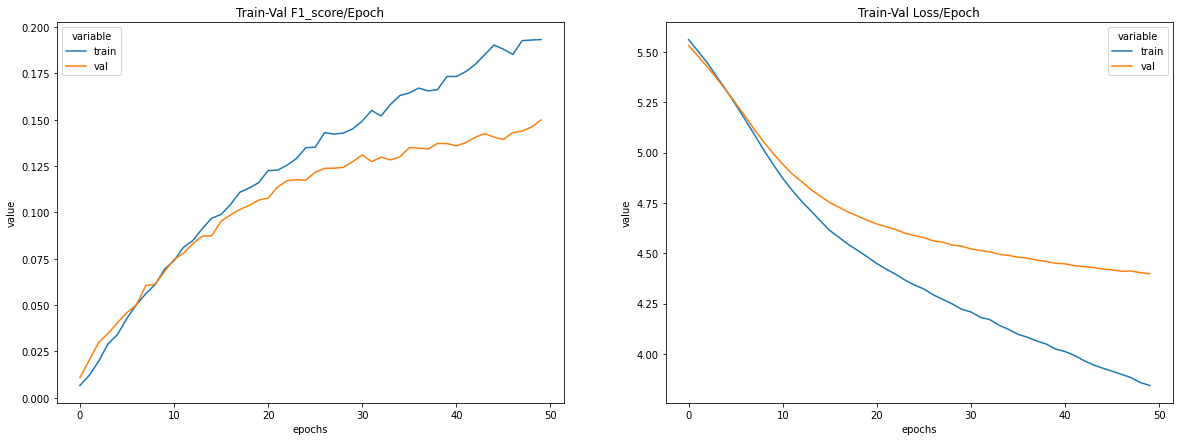

In [ ]:
# Create dataframes
train_val_f1_df = pd.DataFrame.from_dict(f1_score_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_f1_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val F1_score/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

# **Spectrogram Image Extraction for CNN Base Model :**

In [ ]:
# os.makedirs('spec_images')
for bird_foldername in os.listdir('/content/train_audio/'):
    os.makedirs('/content/spec_images/'+bird_foldername)
    for song_name in os.listdir('/content/train_audio/'+bird_foldername):
        y, sr = librosa.load('/content/train_audio/'+bird_foldername+'/'+song_name,duration=duration,sr=sample_rate)
        spectrogram  = librosa.stft(y)
        spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))
        plt.figure(figsize=(15,8))
        librosa.display.specshow(spectrogram_db, sr=sr,y_axis='log' )
        plt.axis('off')
        plt.savefig('/content/spec_images/{}/{}.png'.format(bird_foldername,song_name[:-3].replace(".", "")))
        plt.clf()                        

In [ ]:
!kaggle datasets download -d ashispalai/bird-specto-image

In [ ]:
!unzip '/content/bird-specto-image.zip'

In [7]:
def seed_everything(seed):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

In [44]:
SEED = 42
FRAC = 0.2     # Validation fraction
SR = 32000     # sampling rate
MAXLEN = 20    # seconds
N_MELS = 128
batch_size = 8

seed_everything(SEED)
device = torch.device('cuda')

In [ ]:
!pip install split-folders
import splitfolders
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio('/content/content/spectrogram_image_data', output="./data", seed=SEED, ratio=(1-FRAC, FRAC))

In [45]:
def get_data():
    data_dir = '/content/data'
   
    transform = transforms.Compose([
        #transforms.RandomRotation(20),
        transforms.RandomResizedCrop((512,512)),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor()])

    train_set = datasets.ImageFolder(data_dir + '/train', transform=transform)
    test_set = datasets.ImageFolder(data_dir + '/val', transform=transform)

    train = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    test = DataLoader(test_set, batch_size=batch_size, shuffle=True)

    return train, test

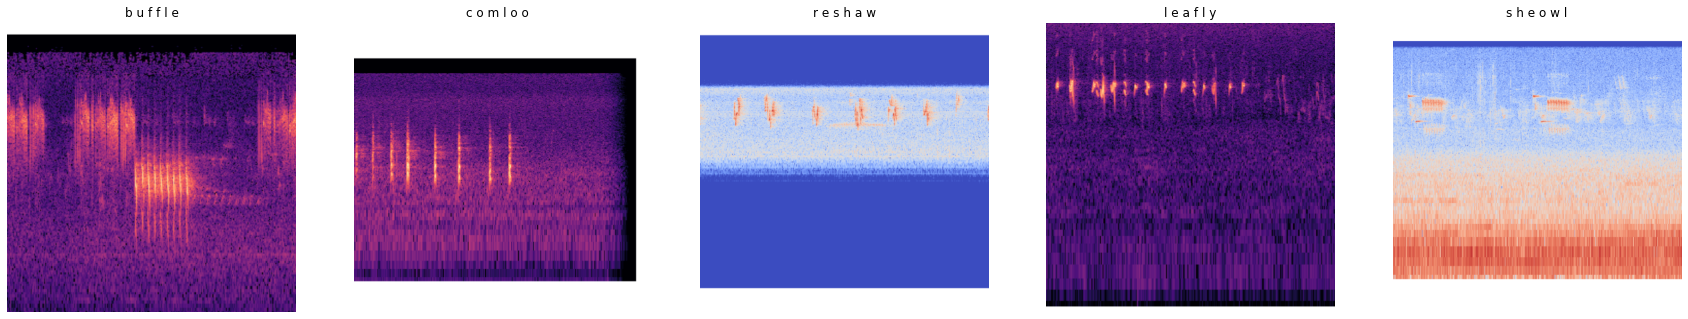

In [98]:
def train_imshow():
    classes = [i for i in os.listdir('/content/data/train')] # Defining the classes we have
    dataiter = iter(train_dataloader)
    images, labels = dataiter.next()
    fig, axes = plt.subplots(figsize=(30, 40), ncols=5)
    for i in range(5):
        ax = axes[i]
        ax.imshow(images[i].permute(1, 2, 0)) 
        ax.title.set_text(' '.join('%5s' % classes[labels[i]]))
        ax.axis('off')
    plt.show()
train_imshow()

# **Base Model-2 (CNN) :**

In [90]:
import torch.nn as nn
import torch.nn.functional as F
import random

class BirdModel(nn.Module):
    def __init__(self, outdim=264):
        super(BirdModel, self).__init__()
        self.conv1 = torch.nn.Conv2d(3, 32, (16, 8), 
                                    stride=(8, 4),
                                    padding=0, 
                                    dilation=1,
                                    groups=1, 
                                    bias=True, 
                                    padding_mode='zeros')
    
        self.conv2 = torch.nn.Conv2d(32, 256, (8, 16), 
                                    stride=(1, 8),
                                    padding=0, 
                                    dilation=1,
                                    groups=1, 
                                    bias=True, 
                                    padding_mode='zeros')
        
        
        
        self.pool = torch.nn.MaxPool2d(kernel_size=(2,2),
                                       stride=None,
                                       padding=0,
                                       dilation=1,
                                       return_indices=False,
                                       ceil_mode=True)
        
        self.fc1 = nn.Linear(13312,264)
        
        self.drop = nn.Dropout(p=0.2)
        self.flat = nn.Flatten()
        self.soft = nn.Softmax()
        
    def forward(self, x):
        
        
        x = self.pool(self.conv1(x))
        x = self.drop(x)
        x = self.pool(self.conv2(x))
        x = self.flat(x)
        
        return (self.soft(self.fc1(x)))

model_ft = BirdModel()
       

print(model_ft)

BirdModel(
  (conv1): Conv2d(3, 32, kernel_size=(16, 8), stride=(8, 4))
  (conv2): Conv2d(32, 256, kernel_size=(8, 16), stride=(1, 8))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=True)
  (fc1): Linear(in_features=13312, out_features=264, bias=True)
  (drop): Dropout(p=0.2, inplace=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (soft): Softmax(dim=None)
)


In [91]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_ft.to(device)

BirdModel(
  (conv1): Conv2d(3, 32, kernel_size=(16, 8), stride=(8, 4))
  (conv2): Conv2d(32, 256, kernel_size=(8, 16), stride=(1, 8))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=True)
  (fc1): Linear(in_features=13312, out_features=264, bias=True)
  (drop): Dropout(p=0.2, inplace=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (soft): Softmax(dim=None)
)

In [92]:
from torchsummary import summary
summary(model_ft,(3,512,512))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 32, 63, 127]          12,320
         MaxPool2d-2           [-1, 32, 32, 64]               0
           Dropout-3           [-1, 32, 32, 64]               0
            Conv2d-4           [-1, 256, 25, 7]       1,048,832
         MaxPool2d-5           [-1, 256, 13, 4]               0
           Flatten-6                [-1, 13312]               0
            Linear-7                  [-1, 264]       3,514,632
           Softmax-8                  [-1, 264]               0
Total params: 4,575,784
Trainable params: 4,575,784
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 3.00
Forward/backward pass size (MB): 3.50
Params size (MB): 17.46
Estimated Total Size (MB): 23.96
----------------------------------------------------------------


In [93]:
train_dataloader, test_dataloader = get_data()

# **Base Model-2 Training :**

In [94]:
learning_rate = 0.01

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(tinymodel.parameters(), lr=learning_rate )

f1_score_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}
EPOCHS = 10

In [95]:
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_f1_score = 0

    model_ft.train()
    for X, y in train_dataloader:
      X, y = X.cuda(), y.cuda() 
      optimizer.zero_grad()

      y_train_pred = model_ft(X)

      train_loss = loss_fn(y_train_pred, y)
      train_f1_score = f1_score(y_train_pred,y, num_classes=264)

      train_loss.backward()
      optimizer.step()

      train_epoch_loss += train_loss.item()
      train_epoch_f1_score += train_f1_score.item()

    
    # VALIDATION    
    torch.no_grad()
    val_epoch_loss = 0
    val_epoch_acc_f1_score = 0

    model_ft.eval()
    for X, y in test_dataloader:
      X, y = X.cuda(), y.cuda() 
      y_val_pred = model_ft(X)
      val_loss = loss_fn(y_val_pred, y)
      val_f1_score= f1_score(y_val_pred,y, num_classes=264)

      val_epoch_loss += val_loss.item()
      val_epoch_acc_f1_score += val_f1_score.item()



    loss_stats['train'].append(train_epoch_loss/len(train_dataloader))
    loss_stats['val'].append(val_epoch_loss/len(test_dataloader))
    f1_score_stats['train'].append(train_epoch_f1_score /len(train_dataloader))
    f1_score_stats['val'].append(val_epoch_acc_f1_score/len(test_dataloader))

    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_dataloader):.5f} | Val Loss: {val_epoch_loss/len(test_dataloader):.5f} | Train_f1_score: {train_epoch_f1_score/len(train_dataloader):.3f}| Val_f1_score: {val_epoch_acc_f1_score/len(test_dataloader):.3f}')

    

Begin training.


 10%|█         | 1/10 [08:06<1:12:57, 486.34s/it]

Epoch 001: | Train Loss: 5.57595 | Val Loss: 5.57595 | Train_f1_score: 0.004| Val_f1_score: 0.003


 20%|██        | 2/10 [16:17<1:05:13, 489.13s/it]

Epoch 002: | Train Loss: 5.57595 | Val Loss: 5.57595 | Train_f1_score: 0.004| Val_f1_score: 0.003


 30%|███       | 3/10 [24:31<57:18, 491.25s/it]  

Epoch 003: | Train Loss: 5.57595 | Val Loss: 5.57595 | Train_f1_score: 0.004| Val_f1_score: 0.004


 40%|████      | 4/10 [32:44<49:13, 492.22s/it]

Epoch 004: | Train Loss: 5.57594 | Val Loss: 5.57595 | Train_f1_score: 0.005| Val_f1_score: 0.004


 50%|█████     | 5/10 [41:18<41:38, 499.78s/it]

Epoch 005: | Train Loss: 5.57595 | Val Loss: 5.57595 | Train_f1_score: 0.004| Val_f1_score: 0.002


 60%|██████    | 6/10 [49:25<33:02, 495.57s/it]

Epoch 006: | Train Loss: 5.57595 | Val Loss: 5.57595 | Train_f1_score: 0.004| Val_f1_score: 0.003


 70%|███████   | 7/10 [57:31<24:37, 492.35s/it]

Epoch 007: | Train Loss: 5.57595 | Val Loss: 5.57595 | Train_f1_score: 0.004| Val_f1_score: 0.002


 80%|████████  | 8/10 [1:06:18<16:46, 503.48s/it]

Epoch 008: | Train Loss: 5.57595 | Val Loss: 5.57595 | Train_f1_score: 0.004| Val_f1_score: 0.004


 90%|█████████ | 9/10 [1:14:29<08:19, 499.49s/it]

Epoch 009: | Train Loss: 5.57595 | Val Loss: 5.57595 | Train_f1_score: 0.005| Val_f1_score: 0.002


100%|██████████| 10/10 [1:22:41<00:00, 496.18s/it]

Epoch 010: | Train Loss: 5.57595 | Val Loss: 5.57595 | Train_f1_score: 0.005| Val_f1_score: 0.003


Text(0.5, 1.0, 'Train-Val Loss/Epoch')

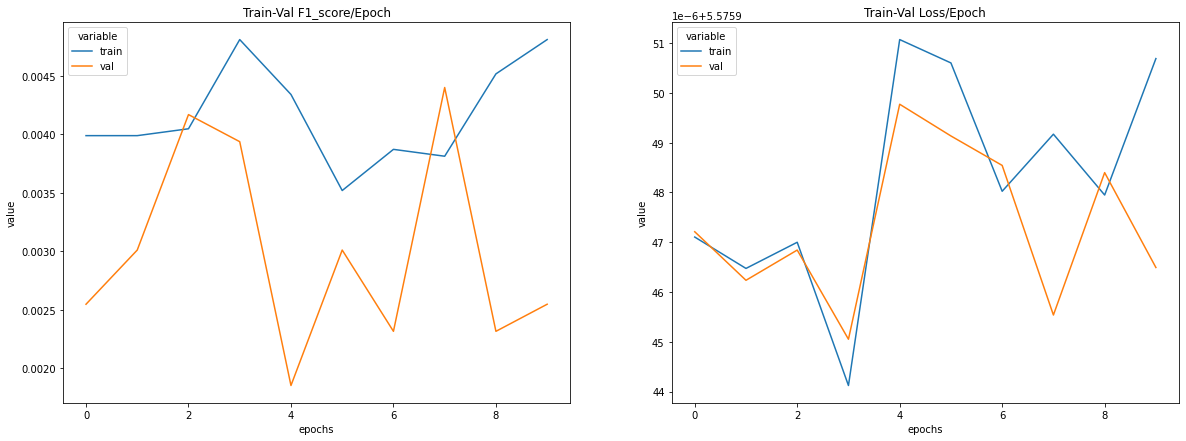

In [96]:
# Create dataframes
train_val_f1_df = pd.DataFrame.from_dict(f1_score_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_f1_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val F1_score/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

### **Conclusions:**


*   Based on the output of above two models, validation score is better using extracted Feature rather than using spectrogram images for CNN model.

